In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load Data

In [2]:
cars=pd.read_csv(r"Z:\226524\Datasets\cars_data.csv")
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Check Null Values

In [3]:
column_names = cars.columns
for column in column_names:
    print(column + ' - ' + str(cars[column].isnull().sum()))

Make - 0
Model - 0
Year - 0
Engine Fuel Type - 3
Engine HP - 69
Engine Cylinders - 30
Transmission Type - 0
Driven_Wheels - 0
Number of Doors - 6
Market Category - 3742
Vehicle Size - 0
Vehicle Style - 0
highway MPG - 0
city mpg - 0
Popularity - 0
MSRP - 0


# Drop Null Values

In [4]:
cars=cars.dropna()

In [5]:
column_names = cars.columns
for column in column_names:
    print(column + ' - ' + str(cars[column].isnull().sum()))

Make - 0
Model - 0
Year - 0
Engine Fuel Type - 0
Engine HP - 0
Engine Cylinders - 0
Transmission Type - 0
Driven_Wheels - 0
Number of Doors - 0
Market Category - 0
Vehicle Size - 0
Vehicle Style - 0
highway MPG - 0
city mpg - 0
Popularity - 0
MSRP - 0


In [6]:
cars.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.244256,-0.046552,0.182905,0.216441,0.180041,0.118304,0.133684
Engine HP,0.244256,1.000000,0.811390,-0.196042,-0.473019,-0.512779,0.038012,0.656662
Engine Cylinders,-0.046552,0.811390,1.000000,-0.178578,-0.603237,-0.615459,0.014825,0.589185
Number of Doors,0.182905,-0.196042,-0.178578,1.000000,0.103413,0.140205,-0.040450,-0.184699
highway MPG,0.216441,-0.473019,-0.603237,0.103413,1.000000,0.821349,0.032504,-0.257585
city mpg,0.180041,-0.512779,-0.615459,0.140205,0.821349,1.000000,0.037057,-0.268003
Popularity,0.118304,0.038012,0.014825,-0.040450,0.032504,0.037057,1.000000,-0.052477
MSRP,0.133684,0.656662,0.589185,-0.184699,-0.257585,-0.268003,-0.052477,1.000000


# Predictors DF

In [7]:
x=cars[['Engine HP','Engine Cylinders','Vehicle Size']]
x

,Engine HP,Engine Cylinders,Vehicle Size
0,335.0,6.0,Compact
1,300.0,6.0,Compact
2,300.0,6.0,Compact
3,230.0,6.0,Compact
4,230.0,6.0,Compact
...,...,...,...
11909,300.0,6.0,Midsize
11910,300.0,6.0,Midsize
11911,300.0,6.0,Midsize
11912,300.0,6.0,Midsize


In [8]:
x=pd.get_dummies(x,columns=['Vehicle Size'])
x

,Engine HP,Engine Cylinders,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize
0,335.0,6.0,1,0,0
1,300.0,6.0,1,0,0
2,300.0,6.0,1,0,0
3,230.0,6.0,1,0,0
4,230.0,6.0,1,0,0
...,...,...,...,...,...
11909,300.0,6.0,0,0,1
11910,300.0,6.0,0,0,1
11911,300.0,6.0,0,0,1
11912,300.0,6.0,0,0,1


# Dependent Variable

In [10]:
y_use=cars['MSRP']
y_use

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 8084, dtype: int64

# Array of both

In [11]:
x_use=np.array(x)
x_use


array([[335.,   6.,   1.,   0.,   0.],
       [300.,   6.,   1.,   0.,   0.],
       [300.,   6.,   1.,   0.,   0.],
       ...,
       [300.,   6.,   0.,   0.,   1.],
       [300.,   6.,   0.,   0.,   1.],
       [221.,   6.,   0.,   0.,   1.]])

In [12]:
#divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

#random state => seed value used by random number generator

x_train,x_test,y_train,y_test=train_test_split(x_use,y_use,test_size=0.3,random_state=0)

In [13]:
#Implement Classifier based on Simple Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
predictions=model.predict(x_test)
predictions

array([ 77555.3703551 ,   5767.06819271,  37815.7153232 , ...,
       -19131.74251028,   5094.1273629 ,  45927.151354  ])

In [15]:
y_test

4406      53235
1181      16495
10567     52055
467      233509
49        50750
          ...  
3020      79195
7351      32390
1473       2000
7018       2038
1197      29990
Name: MSRP, Length: 2426, dtype: int64

In [107]:
r_sq = model.score(x_train,y_train)       #R2 value
r_sq

0.49293127375509316

In [95]:
model.intercept_  #Intercept term

-86089.52900151676

In [96]:
model.coef_  #Coefficients

array([ 3.38781953e+02,  7.86280529e+03, -2.93086866e+00,  1.81355928e+04,
       -1.51268126e+04, -3.00878021e+03])

# ALTERNATIVE Engine HP

In [172]:
cars=pd.read_csv(r"Z:\226524\Datasets\cars_data.csv")
cars=cars.dropna()

In [173]:
x=np.array(cars['Engine HP']).reshape(len(cars),1)
x

array([[335.],
       [300.],
       [300.],
       ...,
       [300.],
       [300.],
       [221.]])

In [174]:
y=np.array(cars['MSRP']).reshape(len(cars),1)
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [150]:
#divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

#random state => seed value used by random number generator

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [151]:
x_train

array([[308.],
       [281.],
       [200.],
       ...,
       [455.],
       [225.],
       [288.]])

In [152]:
#Implement Classifier based on Simple Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [153]:
predictions=model.predict(x_test)
predictions

array([[ 86357.45818056],
       [ -5086.3464882 ],
       [ 35822.72402151],
       ...,
       [-34765.47607367],
       [ -5888.48512565],
       [ 48656.94222063]])

In [154]:
y_test

array([[53235],
       [16495],
       [52055],
       ...,
       [ 2000],
       [ 2038],
       [29990]], dtype=int64)

In [155]:
r_sq = model.score(x_train,y_train)       #R2 value
r_sq

0.45337944516263606

In [156]:
model.intercept_  #Intercept term

array([-60032.8431532])

In [157]:
model.coef_  #Coefficients

array([[401.06931872]])

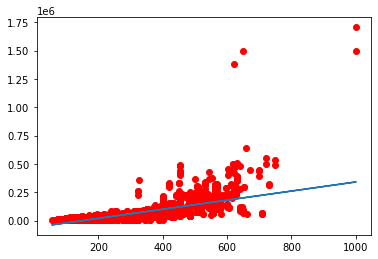

In [159]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [138]:
np.where(y_train>1)

(array([   0,    1,    2, ..., 5655, 5656, 5657], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

# ALTERNATIVE Engine Cylinders

In [160]:
cars=pd.read_csv(r"Z:\226524\Datasets\cars_data.csv")
cars=cars.dropna()

In [161]:
x=np.array(cars['Engine Cylinders']).reshape(len(cars),1)
x

array([[6.],
       [6.],
       [6.],
       ...,
       [6.],
       [6.],
       [6.]])

In [162]:
y=np.array(cars['MSRP']).reshape(len(cars),1)
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [163]:
#divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

#random state => seed value used by random number generator

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [164]:
#Implement Classifier based on Simple Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [165]:
predictions=model.predict(x_test)
predictions

array([[55053.80013858],
       [11620.94670566],
       [98486.6535715 ],
       ...,
       [11620.94670566],
       [11620.94670566],
       [55053.80013858]])

In [166]:
y_test

array([[53235],
       [16495],
       [52055],
       ...,
       [ 2000],
       [ 2038],
       [29990]], dtype=int64)

In [167]:
r_sq = model.score(x_train,y_train)       #R2 value
r_sq

0.35670616037095804

In [168]:
model.intercept_  #Intercept term

array([-75244.76016019])

In [169]:
model.coef_  #Coefficients

array([[21716.42671646]])

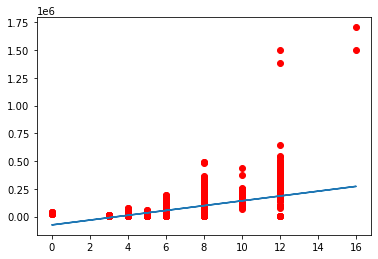

In [170]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

# Alternative removing Outliers

In [188]:
cars=pd.read_csv(r"Z:\226524\Datasets\cars_data.csv")
cars=cars.dropna()

In [189]:
cars['MSRP'].sort_values()

6706        2000
3512        2000
748         2000
747         2000
3513        2000
          ...   
6351     1382750
11363    1500000
8486     1500000
11364    1705769
11362    2065902
Name: MSRP, Length: 8084, dtype: int64

In [197]:
cars=cars[cars.MSRP<1000000]

In [198]:
x=np.array(cars['Engine HP']).reshape(len(cars),1)
x

array([[335.],
       [300.],
       [300.],
       ...,
       [300.],
       [300.],
       [221.]])

In [199]:
y=np.array(cars['MSRP']).reshape(len(cars),1)
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [200]:
#divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

#random state => seed value used by random number generator

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [201]:
#Implement Classifier based on Simple Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [202]:
predictions=model.predict(x_test)
predictions

array([[29378.11536028],
       [11206.22447971],
       [85710.97709006],
       ...,
       [58453.1407692 ],
       [54818.76259309],
       [45732.8171528 ]])

In [203]:
y_test

array([[35705],
       [29845],
       [40140],
       ...,
       [41715],
       [53230],
       [25995]], dtype=int64)

In [204]:
r_sq = model.score(x_train,y_train)       #R2 value
r_sq

0.5392704003238221

In [205]:
model.intercept_  #Intercept term

array([-50578.20451425])

In [206]:
model.coef_  #Coefficients

array([[363.43781761]])

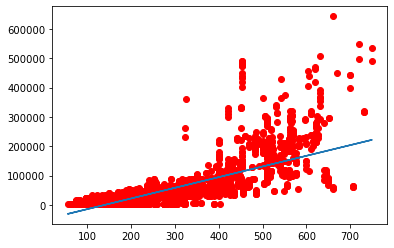

In [207]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

# Alternative removing Outliers

In [214]:
cars=pd.read_csv(r"Z:\226524\Datasets\cars_data.csv")
cars=cars.dropna()

In [215]:
cars=cars[cars.MSRP<1000000]

In [216]:
x=np.array(cars['Engine Cylinders']).reshape(len(cars),1)
x

array([[6.],
       [6.],
       [6.],
       ...,
       [6.],
       [6.],
       [6.]])

In [217]:
y=np.array(cars['MSRP']).reshape(len(cars),1)
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [218]:
#divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

#random state => seed value used by random number generator

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [219]:
#Implement Classifier based on Simple Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [220]:
predictions=model.predict(x_test)
predictions

array([[53633.12672337],
       [14013.00971202],
       [93253.24373472],
       ...,
       [93253.24373472],
       [53633.12672337],
       [14013.00971202]])

In [221]:
y_test

array([[35705],
       [29845],
       [40140],
       ...,
       [41715],
       [53230],
       [25995]], dtype=int64)

In [222]:
r_sq = model.score(x_train,y_train)       #R2 value
r_sq

0.43668270314130864

In [223]:
model.intercept_  #Intercept term

array([-65227.22431067])

In [224]:
model.coef_  #Coefficients

array([[19810.05850567]])

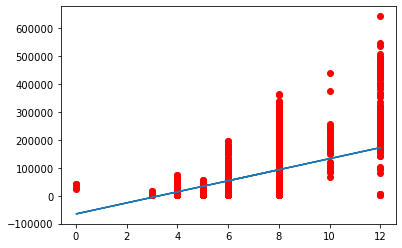

In [225]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))